# Dynamic Programming :
> ### It is a Optimization of Divide and COnquer algorithm
> ### In DIvide and Conquer , we divide the problems into sub problems and solve the sub problems
> ### In Dynamic Programming , we divide the problems into sub problems and solve the sub problems. If the same sub problem comes again and again , we simply store the result and use it when ever required instead of solving it again and again

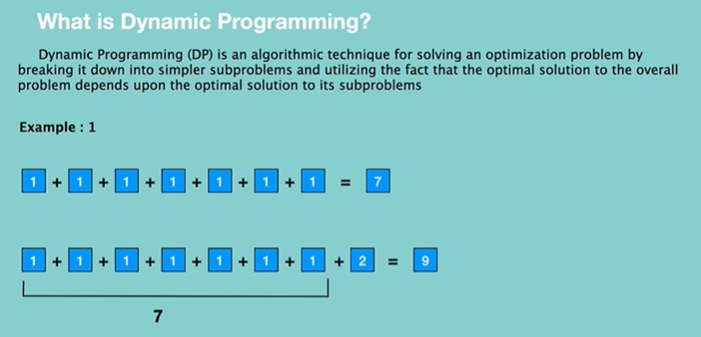

## Properties of Dynamic Programming
### To solve any Problem using Dynamic programming , Check the following conditions
> ### 1. Optimal Substructure property
> ### 2. Overlapping Subproblems property

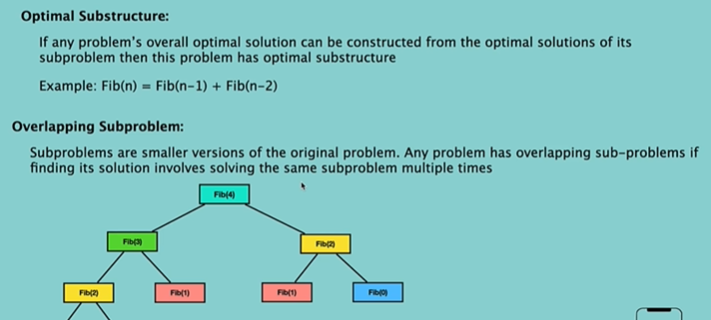

### By using DIvide and Conquer
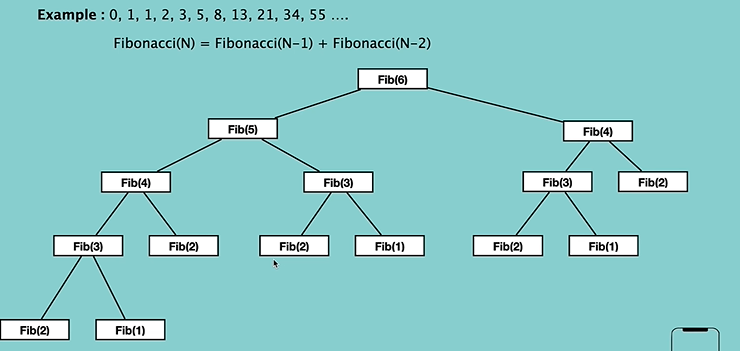


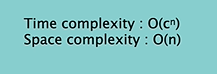

### By using Dynamic Programming
> ### Top Down Approach

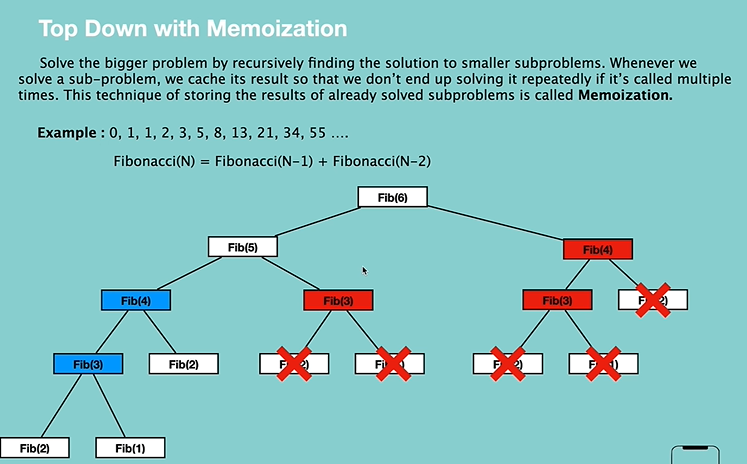

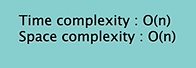

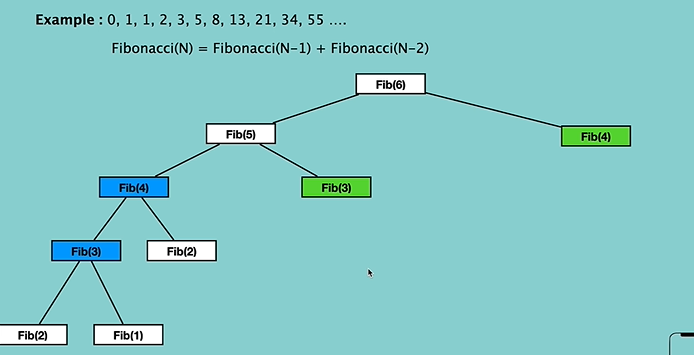

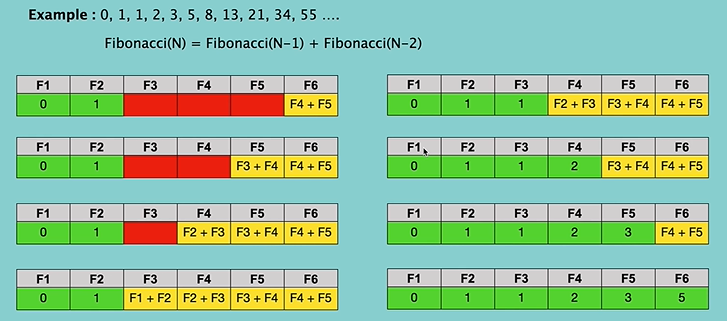

In [4]:
def fibMemory(n , Memory):
    if n in (0,1):
        return n
    elif n not in Memory:
        Memory[n] = fibMemory(n-1 , Memory) + fibMemory(n-2 , Memory)
    return  Memory[n]

In [5]:
fibMemory(6,{})

8

### By using Dynamic Programming
> ### Bottom Up Approach
> ## Bottom Up approach avoids Recursion , Hence Time Complexity improves efficiently

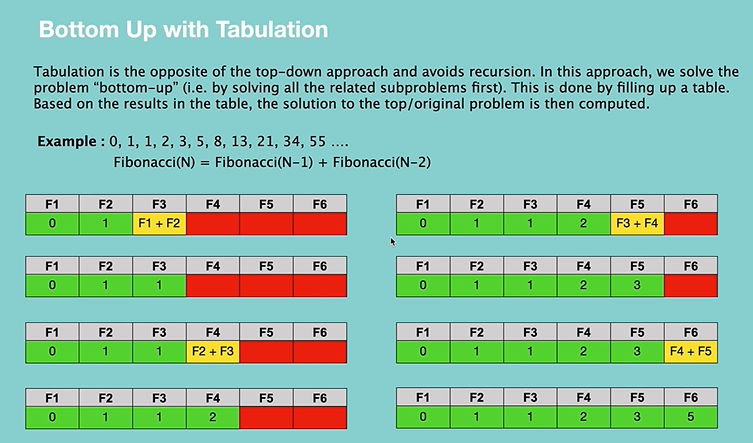

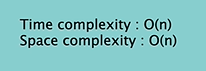

In [1]:
def fibTab(n):
    tb = [0,1]
    for i in range(2,n+1):
        tb.append(tb[i-1]+tb[i-2])
    return tb[n]
        

In [2]:
fibTab(6)

8

### Time Complexity efficiently improves when we solve the problem by using Dynamic Programming
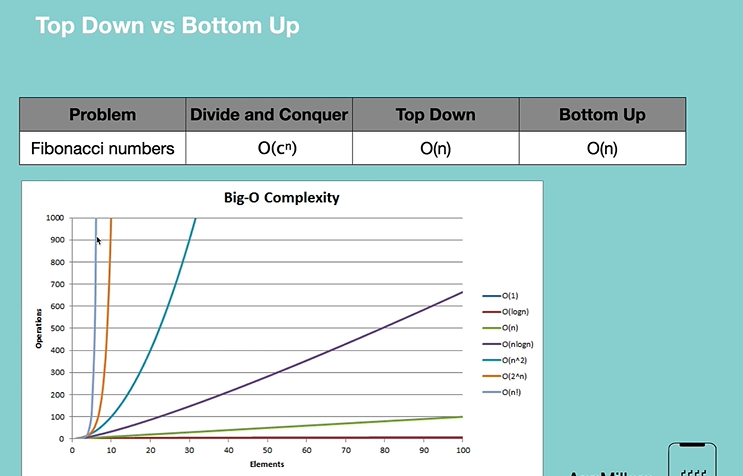

# Top Down vs Bottom up approaches
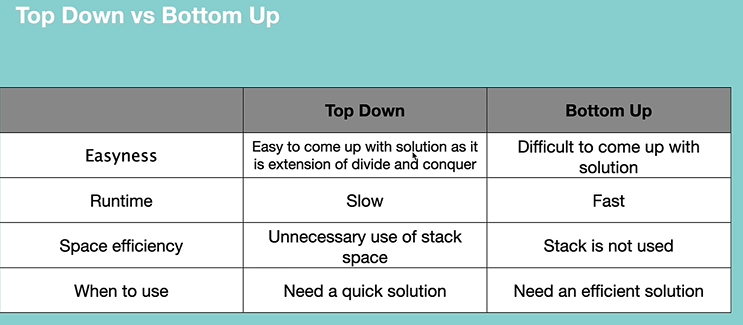

### Is merge sort a dynamic Programming problem ?
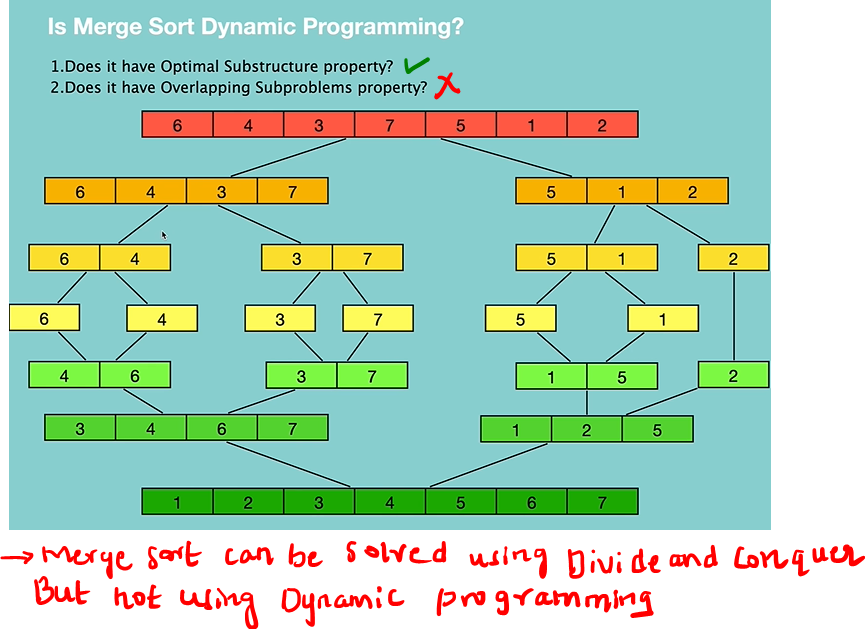

# Number Factor using Dynamic Programming 
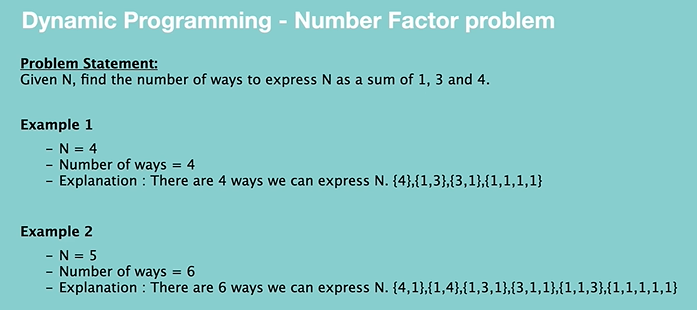

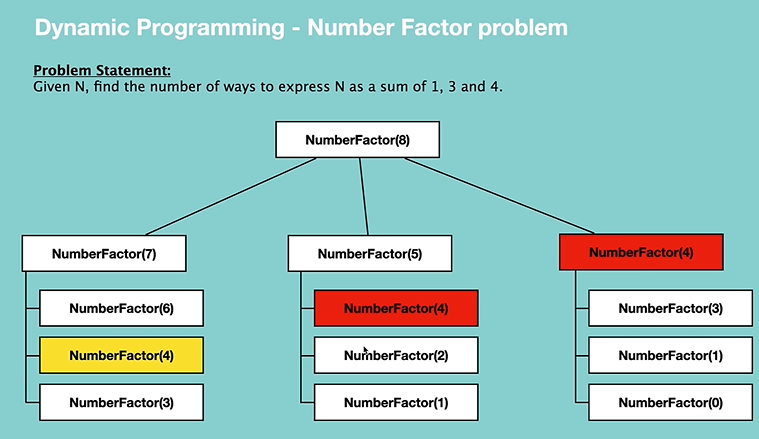

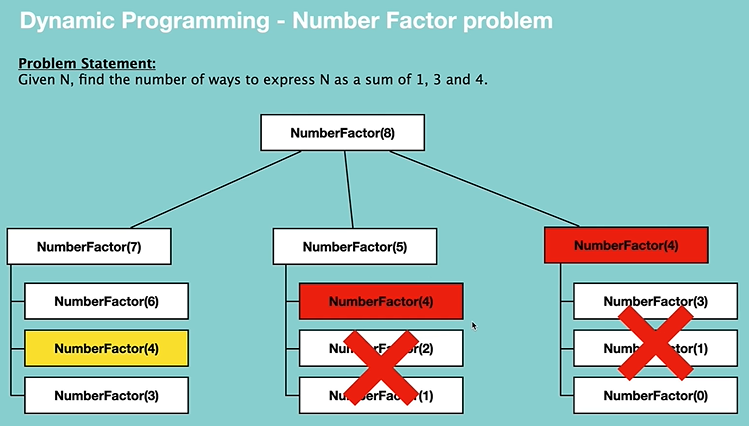

### Top Down Approach
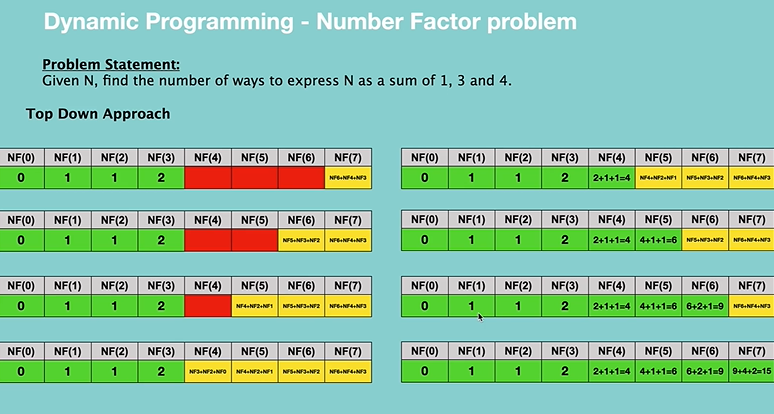

### By adding four steps we can convert Divide and conquer problem into Dynamic Programming Problem
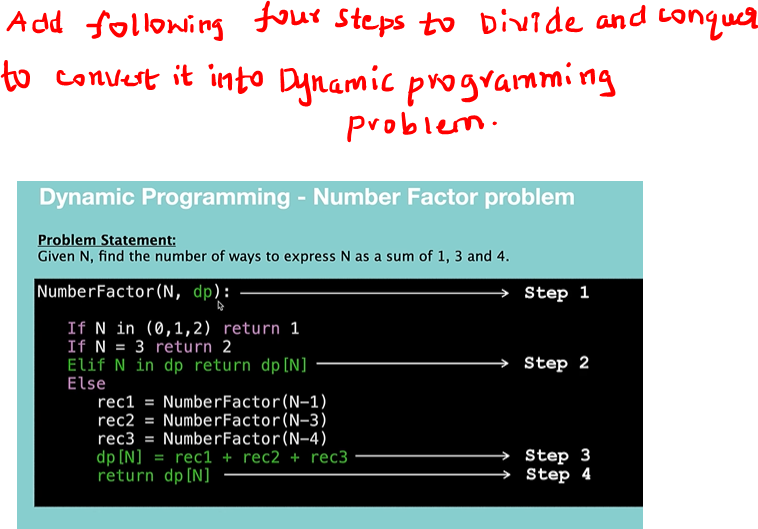

### Divide and COnquer

In [ ]:
def NumberFactor(n):
    if n in (0,1,2):
        return 1
    elif n==3 :
        return 2
    else:
        b1 =  NumberFactor(n-1)
        b3 =  NumberFactor(n-3)
        b4 =  NumberFactor(n-4)
        return b1+b3+b4

### Dynamic programming Top Down approach

In [1]:
def NumberFactor(n,d={}):
    if n in (0,1,2):
        return 1
    elif n==3 :
        return 2
    elif n not in d:
        b1 =  NumberFactor(n-1,d)
        b3 =  NumberFactor(n-3,d)
        b4 =  NumberFactor(n-4,d)
        d[n] = b1+b3 +b4
        return d[n]

In [2]:
NumberFactor(5)

6

### Bottom Up approach
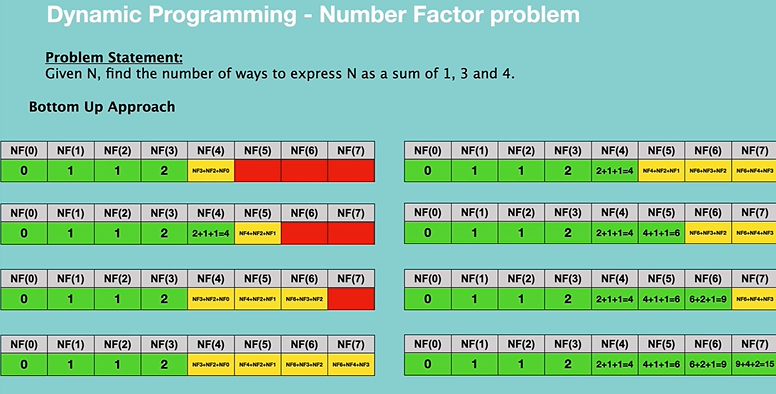

In [16]:
def numberFactor(n):
    tb = [1,1,1,2]
    for i in range(4,n+1):
        tb.append(tb[i-1]+tb[i-3]+tb[i-4])
    return tb[n]

In [17]:
numberFactor(5)

6

# House Robber Problem

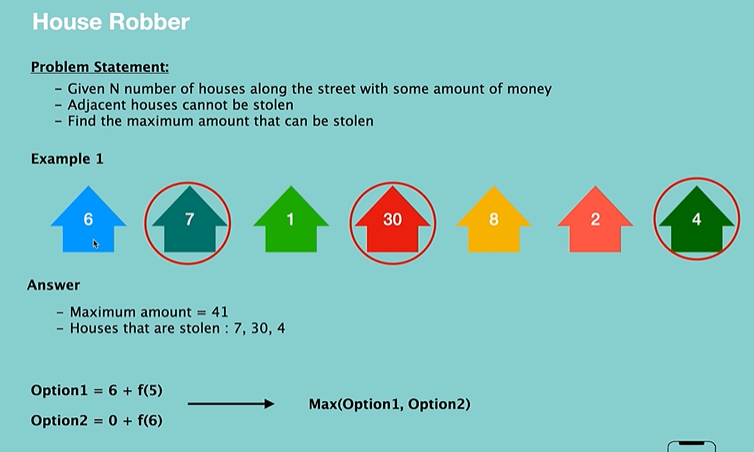

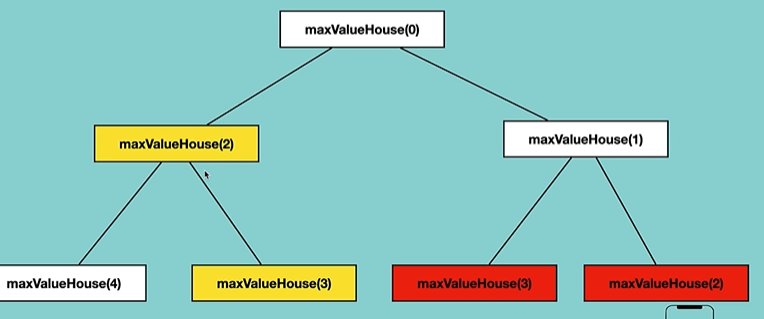

### Top Down approach
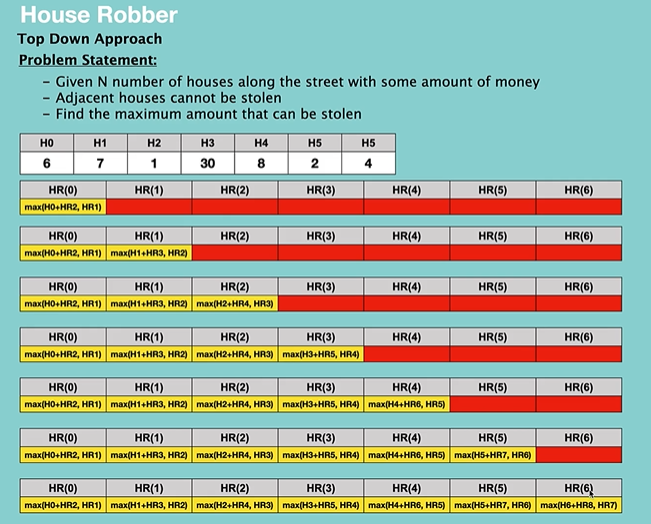

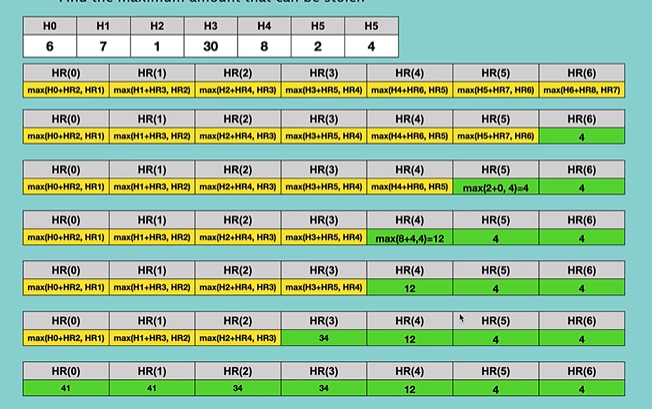

### By adding four steps we can convert Divide and conquer problem into Dynamic Programming Problem
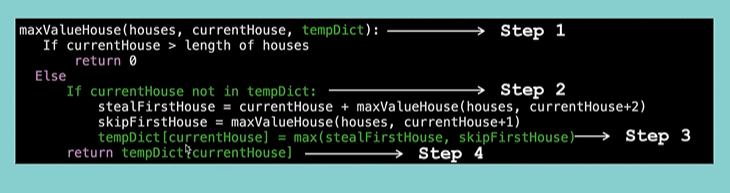

In [7]:
def HouseRobbery(Houses,Index,d={}):
    if Index >= len(Houses):
        return 0
    elif Index not in d:
        First_Select = Houses[Index] + HouseRobbery(Houses,Index+2 , d)
        First_Reject = HouseRobbery(Houses,Index+1 , d)
        d[Index] = max(First_Select,First_Reject)
    return d[Index]

In [8]:
Houses = [6,7,1,30,8,2,4]
HouseRobbery(Houses, 0)

41

### Bottom up approach
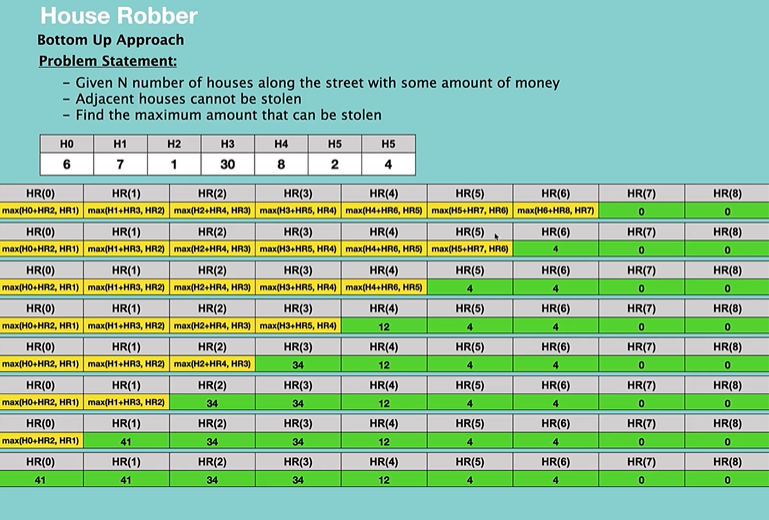

In [23]:
def houseRobber(houses, currentIndex):
    l = [0]*(len(houses)+2)
    for i in range(len(houses)-1,-1,-1):
        l[i] = max(houses[i]+l[i+2] , l[i+1])
    return l[0]

In [24]:
houses = [6,7,1,30,8,2,4]
print(houseRobber(houses, 0))

41


# Convert one string to another string
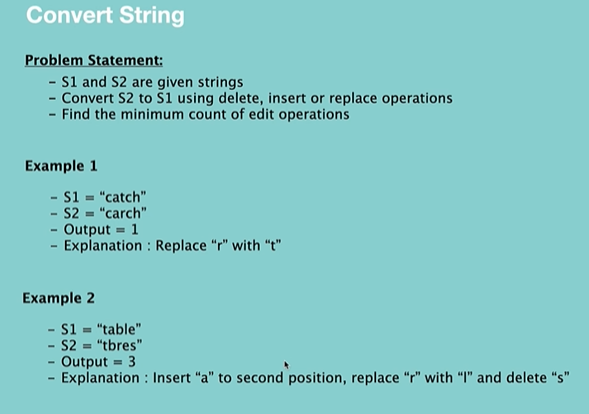

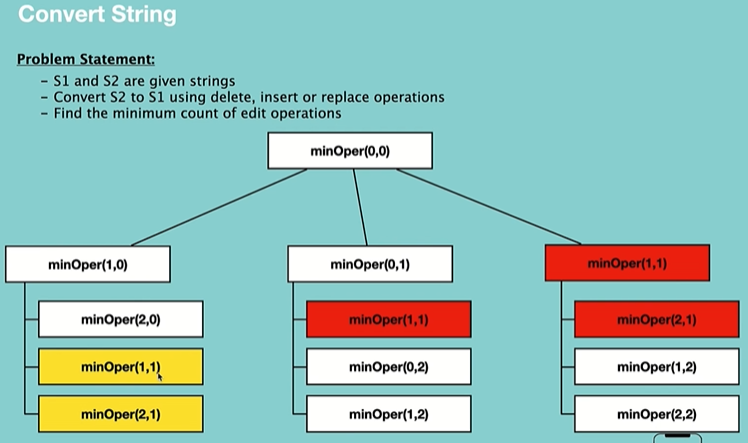

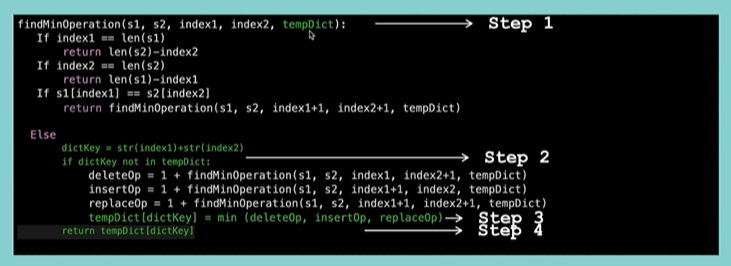

In [9]:
def findMinOperation(s1, s2, index1, index2 , d={}):
    if index1 == len(s1):
        return len(s2)-index2
    if index2 == len(s2):
        return len(s1)-index1
    if s1[index1] == s2[index2]:
        return findMinOperation(s1, s2, index1+1, index2+1)
    else:
        if (index1, index2) not in d:
            deleteOp = 1 + findMinOperation(s1, s2, index1, index2+1)
            insertOp = 1 + findMinOperation(s1, s2, index1+1, index2)
            replaceOp = 1 + findMinOperation(s1, s2, index1+1, index2+1)
            d[(index1, index2)] = min (deleteOp, insertOp, replaceOp)
        return d[(index1, index2)]


In [10]:
print(findMinOperation("table", "tbrltt", 0, 0))

4


### Bottom Up approach


In [31]:
def findMinOperationBU(s1, s2, tempDict):
    for i1 in range(len(s1)+1):
        dictKey = str(i1)+'0'
        tempDict[dictKey] = i1
    for i2 in range(len(s2)+1):
        dictKey = '0'+str(i2)
        tempDict[dictKey] = i2
    
    for i1 in range(1,len(s1)+1):
        for i2 in range(1,len(s2)+1):
            if s1[i1-1] == s2[i2-1]:
                dictKey = str(i1)+str(i2)
                dictKey1 = str(i1-1)+str(i2-1)
                tempDict[dictKey] = tempDict[dictKey1]
            else:
                dictKey = str(i1)+str(i2)
                dictKeyD = str(i1-1)+str(i2)
                dictKeyI = str(i1)+str(i2-1)
                dictKeyR = str(i1-1)+str(i2-1)
                tempDict[dictKey] = 1 + min(tempDict[dictKeyD], min(tempDict[dictKeyI],tempDict[dictKeyR]))
    dictKey = str(len(s1))+str(len(s2))
    return tempDict[dictKey]


In [33]:
print(findMinOperationBU("table", "tbrltt" ,{}))

4


# Zero Knapsack
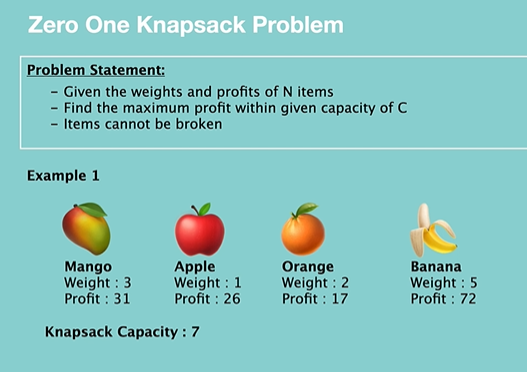

> ### Recursive Tree

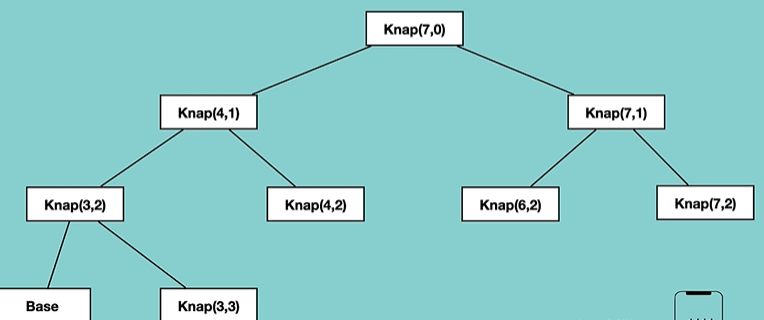

> ### If we see the then , we can identify 1. Optimal Substructure , But it has no 2. Overlapping subproblem property

# Ques : If we don't have Overlapping subproblem property. Can we implement Dynamic Programming ?

> ## Ans : Yes , we can implement . But it will not provide any additional advantage compared to divide and conquer

> ### Hence we can choose either Divide and conquer or Dyanmic programming problem to these type of Non overlapping subproblem  questions

## But it is advisable to solve Non overlapping subproblem  questions with Divide and Conquer . Because in Dynamic Programming we need to write extra steps and extra memory is required to store  

### Top Down approach
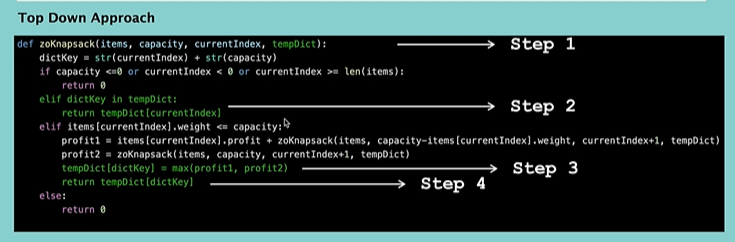

In [35]:
class Item:
    def __init__(self, profit, weight):
        self.profit = profit
        self.weight = weight
def zoKnapsack(items, capacity, currentIndex, tempDict):
    dictKey = str(currentIndex) + str(capacity)
    if capacity <=0 or currentIndex < 0 or currentIndex >= len(items):
        return 0
    elif dictKey in tempDict:
        return tempDict[currentIndex]
    elif items[currentIndex].weight <= capacity:
        profit1 = items[currentIndex].profit + zoKnapsack(items, capacity-items[currentIndex].weight, currentIndex+1, tempDict)
        profit2 = zoKnapsack(items, capacity, currentIndex+1, tempDict)
        tempDict[dictKey] = max(profit1, profit2)
        return tempDict[dictKey]
    else:
        return 0

### Bottom up approach
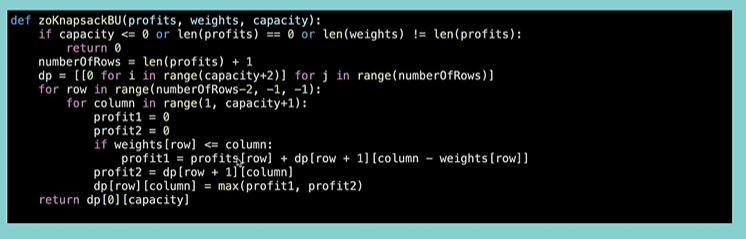

In [34]:
def zoKnapsackBU(profits, weights, capacity):
    if capacity <= 0 or len(profits) == 0 or len(weights) != len(profits):
        return 0
    numberOfRows = len(profits) + 1
    dp = [[None for i in range(capacity+2)] for j in range(numberOfRows)]
    for i in range(numberOfRows):
        dp[i][0] = 0
    for i in range(capacity+1):
        dp[numberOfRows-1][i] = 0
    for row in range(numberOfRows-2, -1, -1):
        for column in range(1,capacity+1):
            profit1 = 0
            profit2 = 0
            if weights[row] <= column:
                profit1 = profits[row] + dp[row + 1][column - weights[row]]
            profit2 = dp[row + 1][column]
            dp[row][column] = max(profit1, profit2)
    return dp[0][capacity]
